In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
from glob import glob

In [2]:
def load_image(path):
    """Load an image using OpenCV and convert to RGB for display."""
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, img_rgb

def convert_to_lab(img):
    """Convert RGB image to Lab color space."""
    return cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

def apply_kmeans(img_lab, k=4):
    """Apply K-Means clustering on Lab image."""
    pixels = img_lab.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    segmented = kmeans.cluster_centers_[labels].reshape(img_lab.shape)
    segmented_rgb = cv2.cvtColor(segmented.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return segmented_rgb, labels.reshape(img_lab.shape[:2]), kmeans.cluster_centers_

In [3]:
# Path to your folder containing number plate images
image_folder = "input_images"
image_paths = glob(os.path.join(image_folder, "*.jpg")) + \
              glob(os.path.join(image_folder, "*.png")) + \
              glob(os.path.join(image_folder, "*.jpeg"))

images = []
for path in image_paths:
    _, img_rgb = load_image(path)
    images.append((path, img_rgb))
    print(f"Loaded: {path}")

if len(images) == 0:
    print("No images found. Please check the folder path.")

Loaded: input_images\car-1-_jpg.rf.9dad63844b6a27c570819fa2c6d3a01d.jpg
Loaded: input_images\car-15-_jpg.rf.1782178d90e3002c8577d4f4f5178f28.jpg
Loaded: input_images\car-237-_jpg.rf.10d575148e2074ef3a28eb56173f3633.jpg
Loaded: input_images\car-246-_jpg.rf.6a71436cd58886cd81b5b6045db9212f.jpg
Loaded: input_images\car-352-_jpg.rf.2d7ae876ae990d6577158d28576bbd5e.jpg
Loaded: input_images\car-39-_jpg.rf.fd50b126bfeb8b292967019474d8a752.jpg
Loaded: input_images\car-40-_jpg.rf.5a1c5749c8490a2ff70fea1267d4c40a.jpg
Loaded: input_images\car-535-_jpg.rf.261cc310cd65d2bb2778df3ace0942ad.jpg
Loaded: input_images\car-649-_jpg.rf.562349cc133392f71c90b6d5f5e44b88.jpg
Loaded: input_images\car-784-_jpg.rf.68f857b3eafa5c4043677ab5c3c0312b.jpg


In [4]:
segmented_results = []

for path, img_rgb in images:
    # Convert to Lab
    img_lab = convert_to_lab(img_rgb)
    
    # Apply K-Means with K=4
    segmented_rgb, labels, centers = apply_kmeans(img_lab, k=4)
    
    # Store results
    segmented_results.append({
        'path': path,
        'original': img_rgb,
        'segmented': segmented_rgb,
        'labels': labels,
        'centers': centers
    })
    print(f"Processed: {path}")

Processed: input_images\car-1-_jpg.rf.9dad63844b6a27c570819fa2c6d3a01d.jpg
Processed: input_images\car-15-_jpg.rf.1782178d90e3002c8577d4f4f5178f28.jpg
Processed: input_images\car-237-_jpg.rf.10d575148e2074ef3a28eb56173f3633.jpg
Processed: input_images\car-246-_jpg.rf.6a71436cd58886cd81b5b6045db9212f.jpg
Processed: input_images\car-352-_jpg.rf.2d7ae876ae990d6577158d28576bbd5e.jpg
Processed: input_images\car-39-_jpg.rf.fd50b126bfeb8b292967019474d8a752.jpg
Processed: input_images\car-40-_jpg.rf.5a1c5749c8490a2ff70fea1267d4c40a.jpg
Processed: input_images\car-535-_jpg.rf.261cc310cd65d2bb2778df3ace0942ad.jpg
Processed: input_images\car-649-_jpg.rf.562349cc133392f71c90b6d5f5e44b88.jpg
Processed: input_images\car-784-_jpg.rf.68f857b3eafa5c4043677ab5c3c0312b.jpg


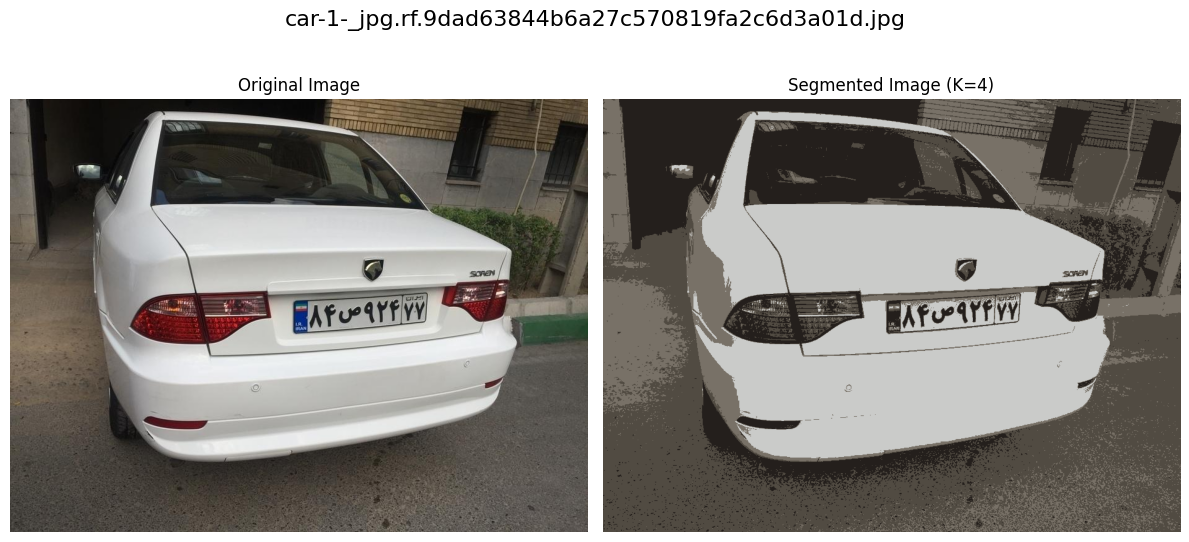

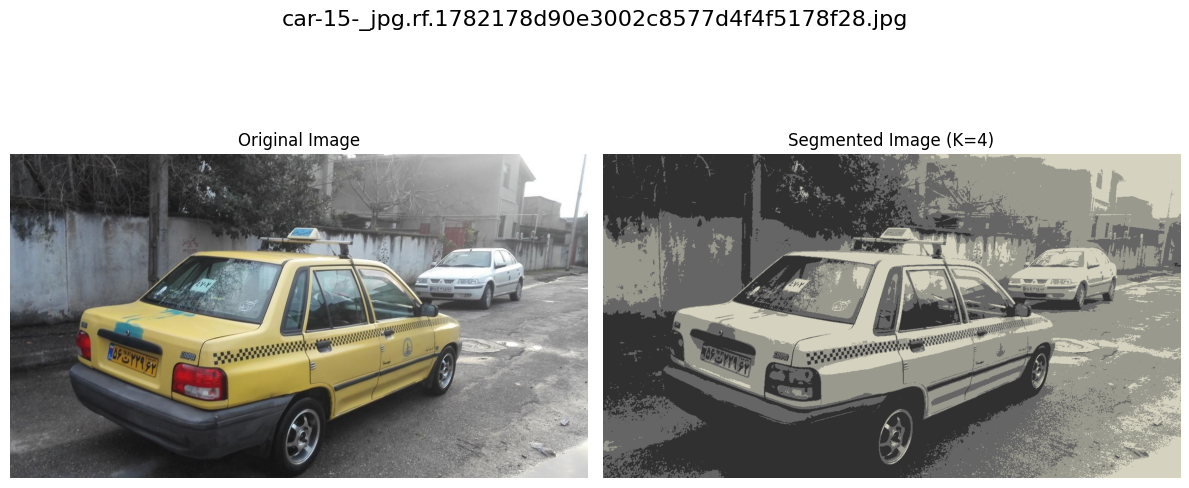

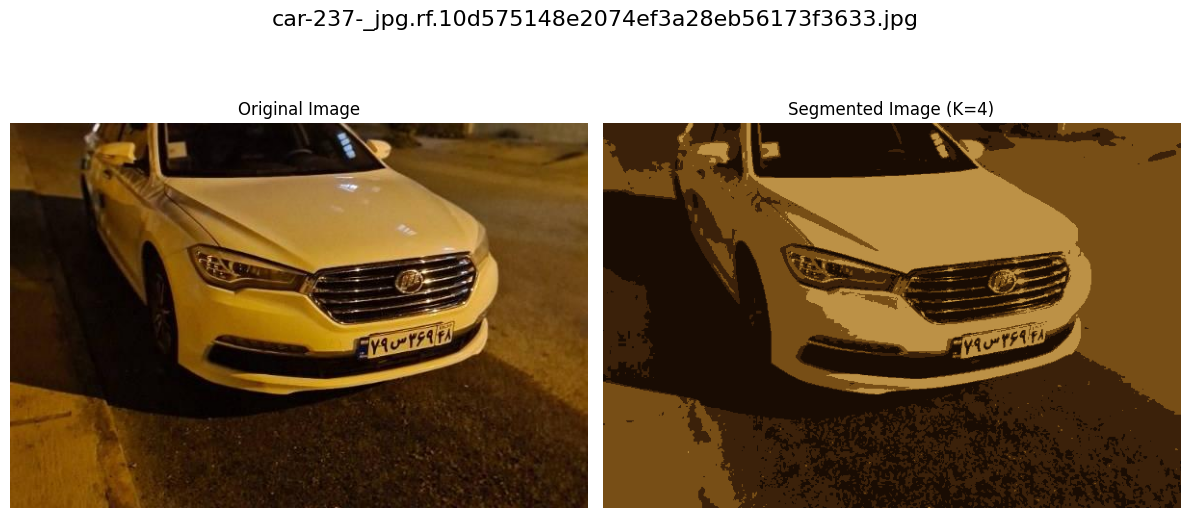

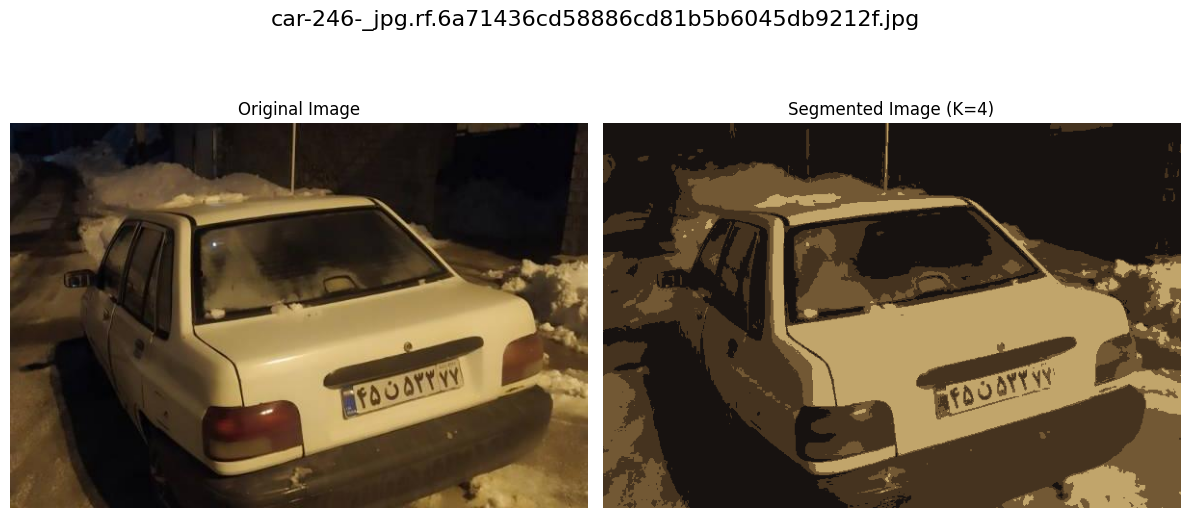

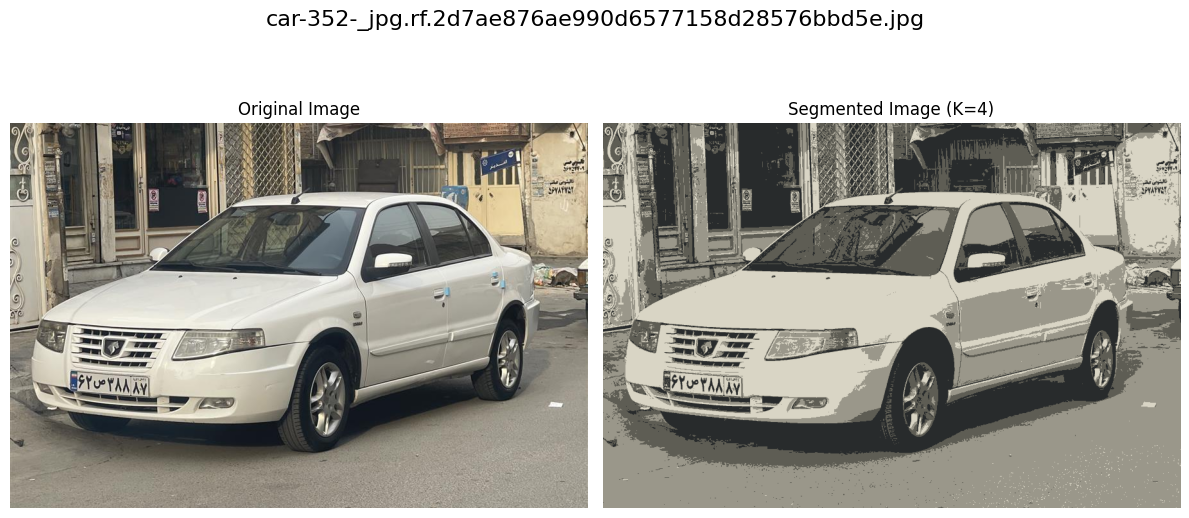

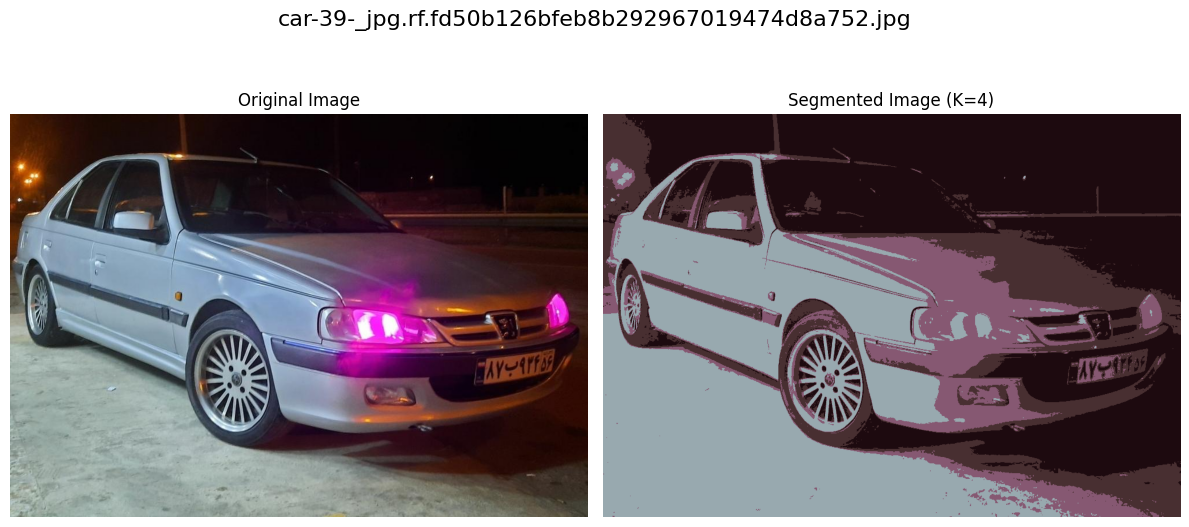

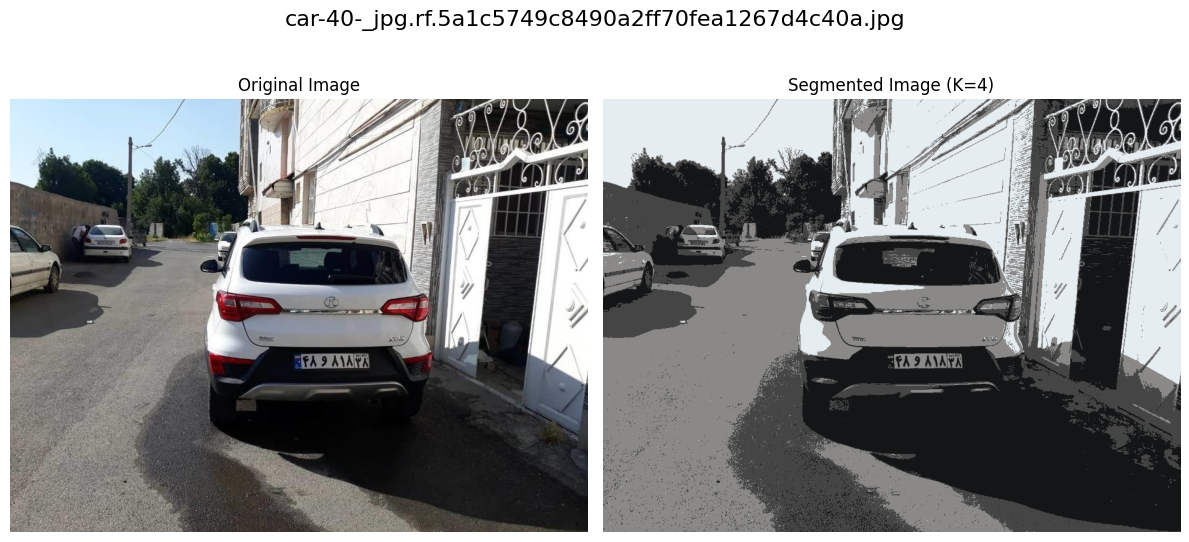

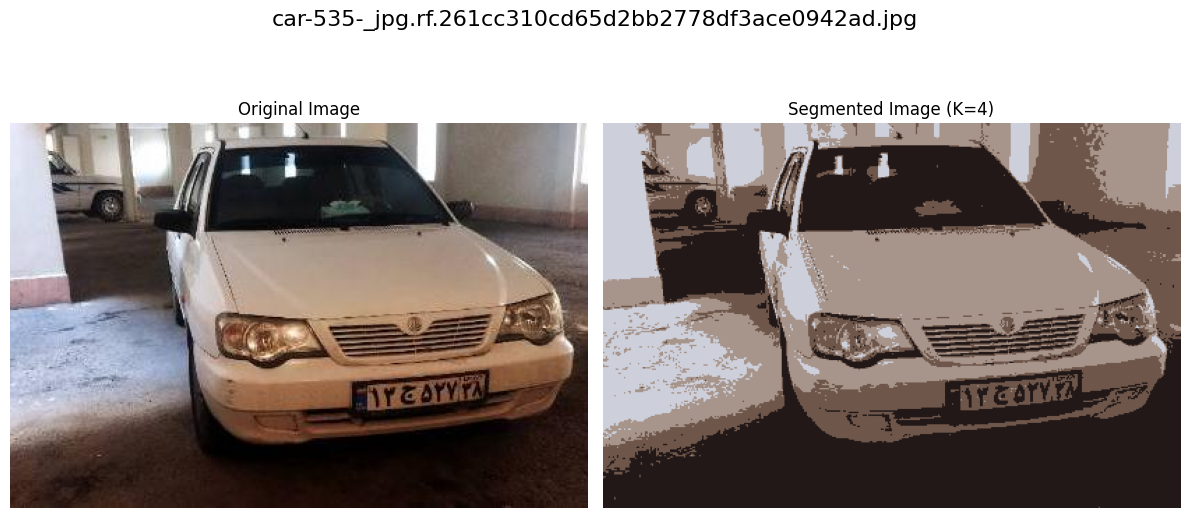

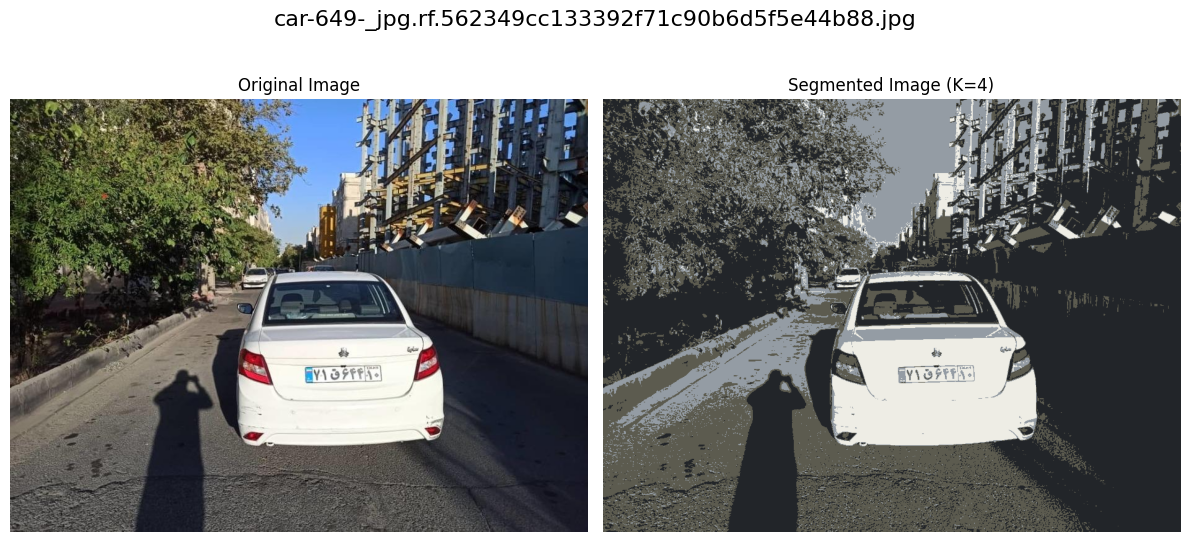

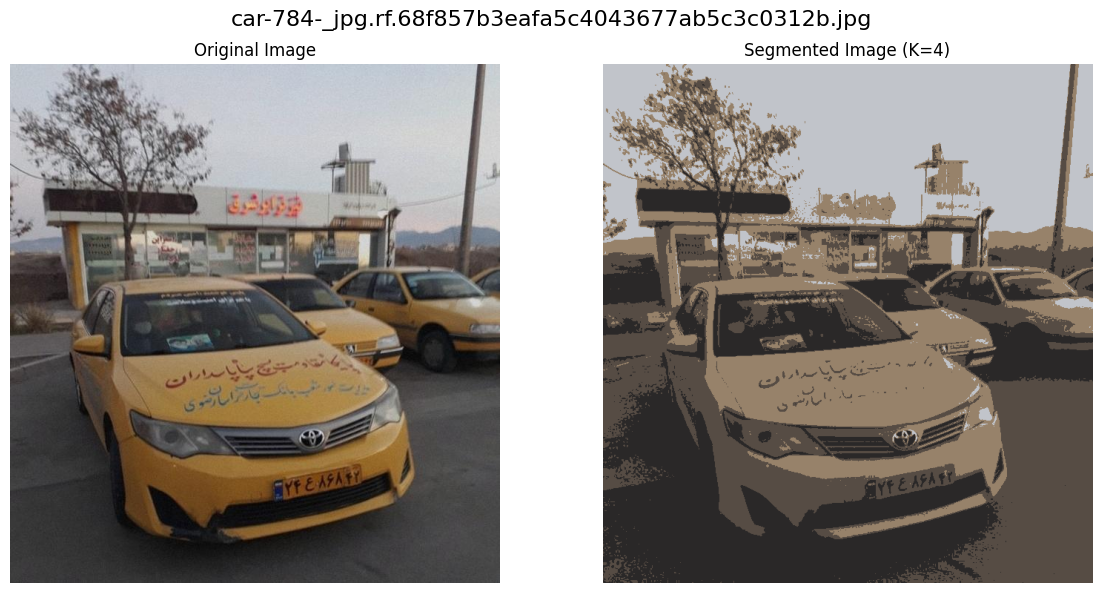

In [5]:
def plot_results(original, segmented, title="Number Plate Segmentation (K=4)"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(segmented)
    axes[1].set_title("Segmented Image (K=4)")
    axes[1].axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

for result in segmented_results:
    plot_results(result['original'], result['segmented'], title=os.path.basename(result['path']))

In [6]:
output_folder = "output_results"
os.makedirs(output_folder, exist_ok=True)

for result in segmented_results:
    file_name = os.path.basename(result['path'])
    output_path = os.path.join(output_folder, f"segmented_{file_name}")
    
    # Convert RGB to BGR for OpenCV save
    segmented_bgr = cv2.cvtColor(result['segmented'], cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, segmented_bgr)
    
    print(f"Saved: {output_path}")

Saved: output_results\segmented_car-1-_jpg.rf.9dad63844b6a27c570819fa2c6d3a01d.jpg
Saved: output_results\segmented_car-15-_jpg.rf.1782178d90e3002c8577d4f4f5178f28.jpg
Saved: output_results\segmented_car-237-_jpg.rf.10d575148e2074ef3a28eb56173f3633.jpg
Saved: output_results\segmented_car-246-_jpg.rf.6a71436cd58886cd81b5b6045db9212f.jpg
Saved: output_results\segmented_car-352-_jpg.rf.2d7ae876ae990d6577158d28576bbd5e.jpg
Saved: output_results\segmented_car-39-_jpg.rf.fd50b126bfeb8b292967019474d8a752.jpg
Saved: output_results\segmented_car-40-_jpg.rf.5a1c5749c8490a2ff70fea1267d4c40a.jpg
Saved: output_results\segmented_car-535-_jpg.rf.261cc310cd65d2bb2778df3ace0942ad.jpg
Saved: output_results\segmented_car-649-_jpg.rf.562349cc133392f71c90b6d5f5e44b88.jpg
Saved: output_results\segmented_car-784-_jpg.rf.68f857b3eafa5c4043677ab5c3c0312b.jpg


In [7]:
print("Observations Summary:")
print("-" * 25)
for i, result in enumerate(segmented_results):
    print(f"Image {i+1}: {os.path.basename(result['path'])}")
    print(f"  Cluster Centers (Lab values):")
    for j, center in enumerate(result['centers']):
        print(f"    Cluster {j}: L={center[0]:.1f}, a={center[1]:.1f}, b={center[2]:.1f}")
    print(f"  Unique labels found: {np.unique(result['labels'])}")
    print()

Observations Summary:
-------------------------
Image 1: car-1-_jpg.rf.9dad63844b6a27c570819fa2c6d3a01d.jpg
  Cluster Centers (Lab values):
    Cluster 0: L=122.2, a=129.4, b=134.9
    Cluster 1: L=208.3, a=127.5, b=129.0
    Cluster 2: L=31.1, a=130.0, b=131.7
    Cluster 3: L=82.4, a=129.1, b=134.2
  Unique labels found: [0 1 2 3]

Image 2: car-15-_jpg.rf.1782178d90e3002c8577d4f4f5178f28.jpg
  Cluster Centers (Lab values):
    Cluster 0: L=51.2, a=128.8, b=128.0
    Cluster 1: L=161.6, a=126.8, b=134.6
    Cluster 2: L=215.3, a=125.8, b=138.4
    Cluster 3: L=110.0, a=128.1, b=128.2
  Unique labels found: [0 1 2 3]

Image 3: car-237-_jpg.rf.10d575148e2074ef3a28eb56173f3633.jpg
  Cluster Centers (Lab values):
    Cluster 0: L=94.1, a=140.3, b=166.2
    Cluster 1: L=160.7, a=136.1, b=173.8
    Cluster 2: L=11.6, a=132.9, b=133.2
    Cluster 3: L=40.9, a=138.2, b=147.2
  Unique labels found: [0 1 2 3]

Image 4: car-246-_jpg.rf.6a71436cd58886cd81b5b6045db9212f.jpg
  Cluster Centers (Lab 